# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

<p>The task is to develop a predictive model that identifies the key features influencing used car prices by analyzing a dataset of vehicle attributes. This involves transforming the business objective into a data-driven task where the target variable is the car price, and the independent variables include both numerical and categorical features. The analysis will require data preprocessing, feature engineering, and the application of regression models to quantify the impact of each feature, with the end goal of providing data-driven insights into the factors that most significantly affect used car valuations.</p>

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The dataset contains 18 columns: price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, state.

<b>Data Quality Issues:</b>
<li>Price column has many outliers that can skew the results and will be filtered to car valuations where 1000 <= valuation <= 100000</li>
<li>Year column has some missing values which may be possible to find with model and manufacturer information</li>
<li>Manufacturer has some missing values, but based on the model feature, manufacturer column can be filled in</li>
<li>Model feature has approximately 1.2% data missing. Rows missing model will be dropped</li>
<li>Condition can be assumed with the most common condition based on the year of the car for the same model and manufacturer</li>
<li>Cylinders and Fuel can be assumed based on Manufacturer, Model, Year</li>
<li>Odometer can be assumed based on the average odometer of the vehicle of the same Manufacturer, Model, and Year</li>
<li>Transmission can be assumed based on Manufacturer, Model, and Year of the vehicle</li>
<br>
<b>Data Type Issues:</b>
<li>Year can be changed to an integer</li>
<li>Cylinders can be converted to integer data type</li>
<li>Condition and size need ordinal encoding</li>
<li>Manufacturer, Fuel, Transmission, Drive, Type and Paint Color are categories that can have one hot encoding</li>
<br>
<b>Other Issues:</b>
<li>VIN is Vehicle Identification Number, which is unique to every vehicle. There are numerous records with the same VIN indicating that there are duplicates in the data</li>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

In [9]:
warnings.filterwarnings("ignore")

In [10]:
vehicles_df = pd.read_csv('data/vehicles.csv')
vehicles_df.shape

(426880, 18)

In [11]:
vehicles_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [12]:
vehicles_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [13]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [14]:
vehicles_df.price.value_counts()

price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64

In [15]:
vehicles_df.price.mean()

75199.0331873126

In [16]:
vehicles_df[(vehicles_df.price >= 1000) & (vehicles_df.price <= 100000)].shape

(379910, 18)

In [17]:
vehicles_df.manufacturer.value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [18]:
vehicles_df.model.value_counts()

model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

In [19]:
vehicles_df.condition.value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [20]:
vehicles_df.cylinders.value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [21]:
vehicles_df.fuel.value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [22]:
vehicles_df.odometer.value_counts()

odometer
100000.0    2263
1.0         2246
0.0         1965
200000.0    1728
150000.0    1603
            ... 
149468.0       1
154259.0       1
111887.0       1
213826.0       1
26892.0        1
Name: count, Length: 104870, dtype: int64

In [23]:
vehicles_df.title_status.value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [24]:
vehicles_df.transmission.value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

In [25]:
vehicles_df.drive.value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

In [26]:
vehicles_df['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [27]:
vehicles_df.type.value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [28]:
vehicles_df.paint_color.value_counts()

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

In [29]:
vehicles_df.state.value_counts()

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: count, dtype: int64

In [30]:
vehicles_df.year.max(), vehicles_df.year.min()

(2022.0, 1900.0)

In [31]:
vehicles_df.VIN.value_counts()

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
JTHCF5C25A5041393      1
SAJGX2749VCOO8376      1
Name: count, Length: 118246, dtype: int64

#### Data Visualizations

In [33]:
# Calculate the percentage of missing values
missing_percentages = vehicles_df.isnull().mean() * 100
print(missing_percentages)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


##### Visualization of percentages of missing data per column

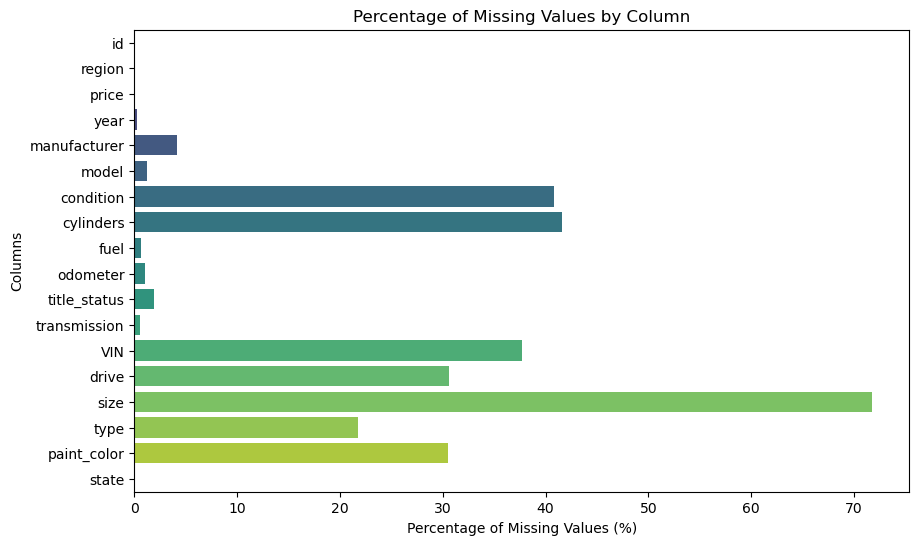

In [35]:
missing_df = missing_percentages.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing_Percentage', y='Column', data=missing_df, palette='viridis')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')
plt.show()

##### Visualization of Price by Type of Car

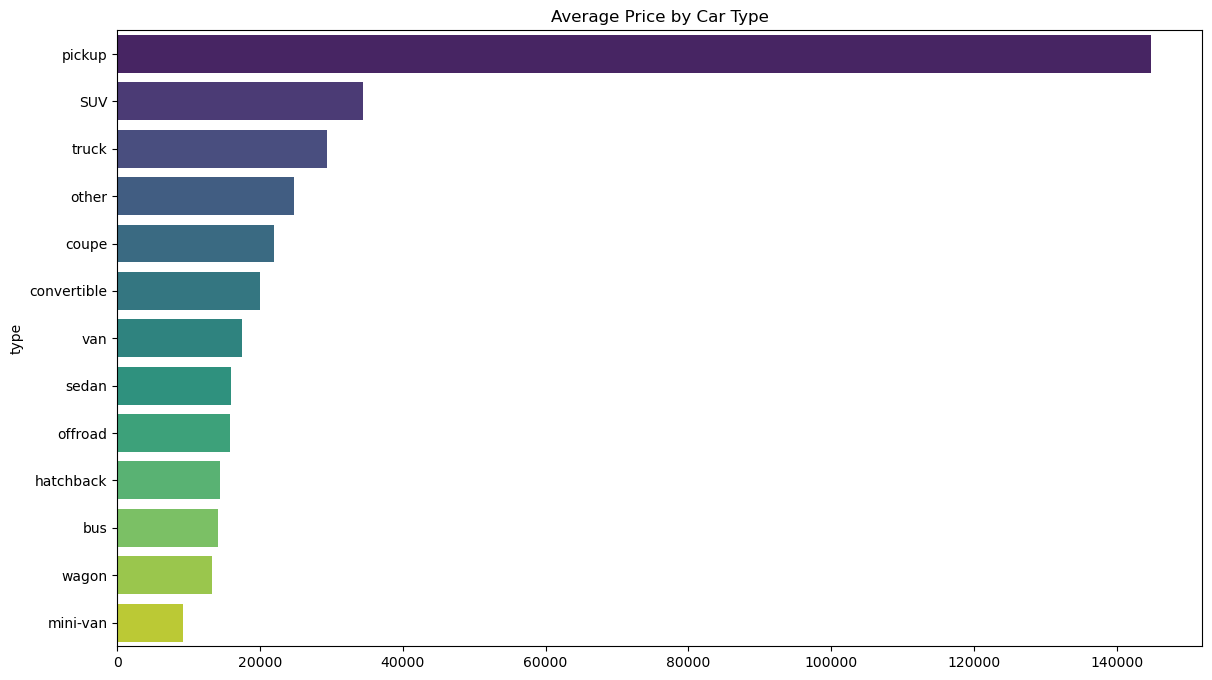

In [37]:
plt.figure(figsize=(14, 8))
average_price_by_type = vehicles_df.groupby('type')['price'].mean().sort_values(ascending=False)
sns.barplot(x=average_price_by_type.values, y=average_price_by_type.index, palette='viridis')
plt.title('Average Price by Car Type')
plt.show()

##### Visualization of Price by Car Manufacturer

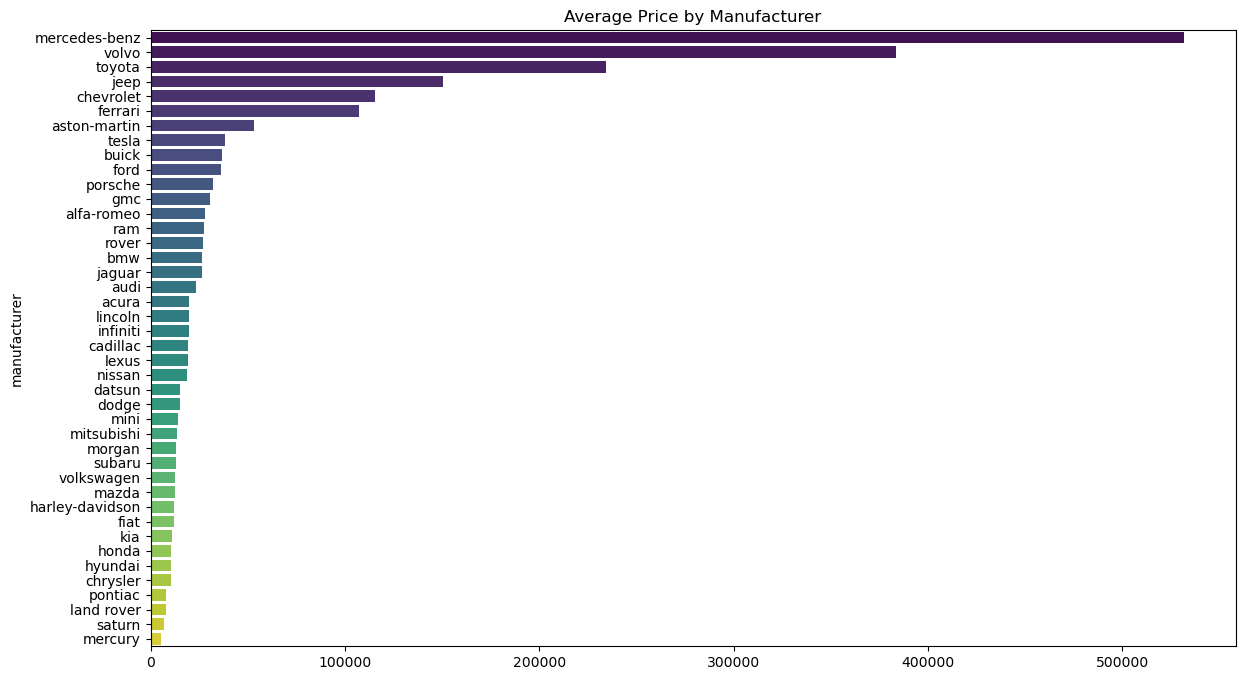

In [39]:
plt.figure(figsize=(14, 8))
average_price_by_manufacturer = vehicles_df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
sns.barplot(x=average_price_by_manufacturer.values, y=average_price_by_manufacturer.index, palette='viridis')
plt.title('Average Price by Manufacturer')
plt.show()

##### Visualization of Price by Car Size

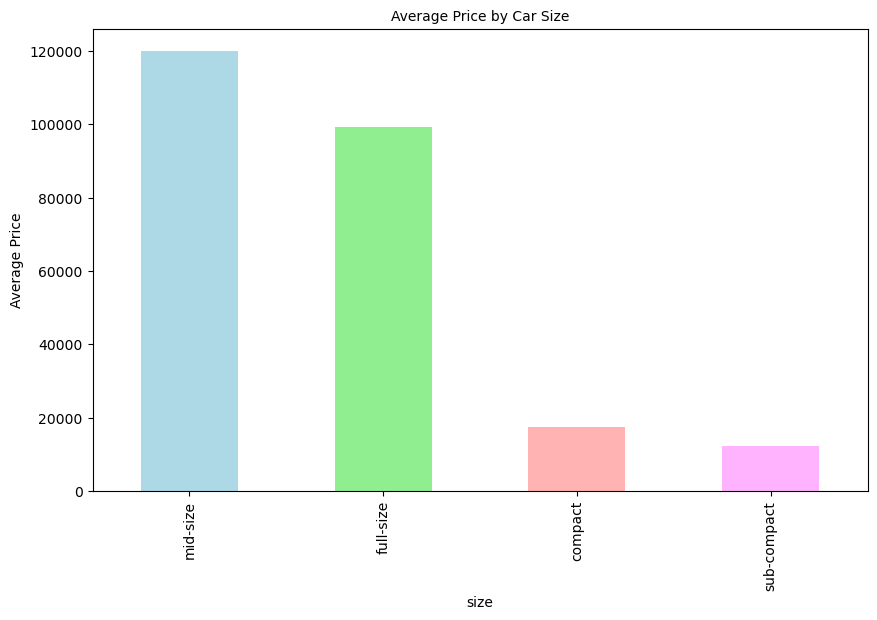

In [41]:
plt.figure(figsize = (10, 6))
grouped = vehicles_df.groupby(['size'])['price'].mean().sort_values(ascending = False)
grouped.plot(kind = 'bar', color=["lightblue", "lightgreen", "#ffb3b3", "#ffb3ff"], fontsize=10)
plt.xlabel("size", fontsize=10)
plt.ylabel("Average Price", fontsize=10)
plt.title("Average Price by Car Size", fontsize = 10)
plt.show()

##### Visualization of Price by Manufacturing Year

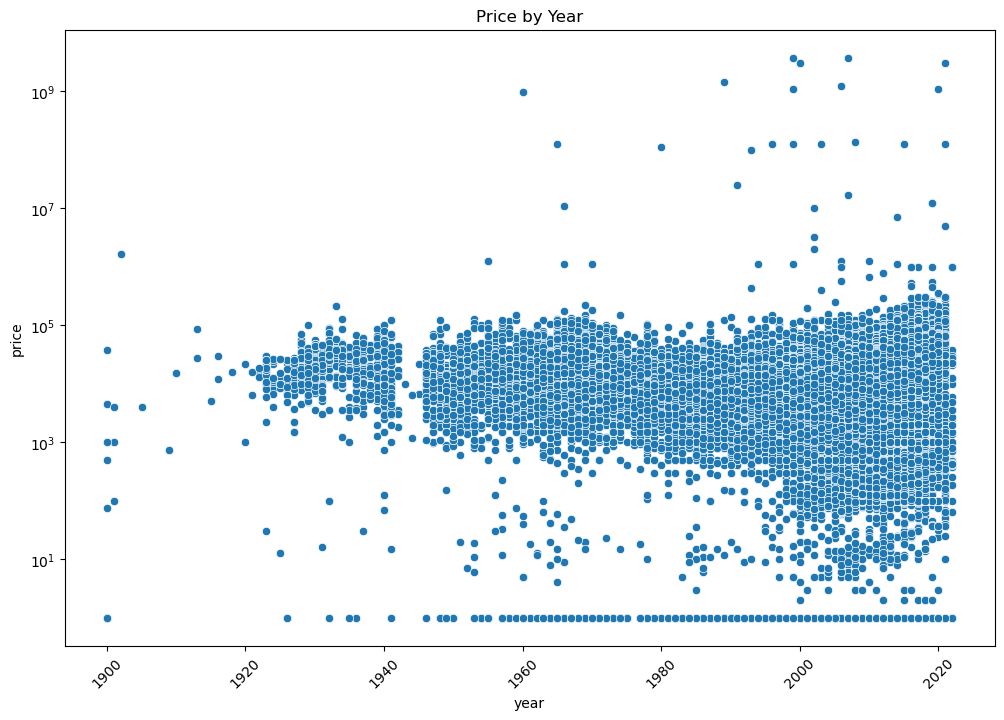

In [43]:
plt.figure(figsize=(12,8))
year_plot = sns.scatterplot( data=vehicles_df, x='year', y='price' )
year_plot.set(yscale='log')
plt.title('Price by Year')
plt.xticks(rotation = 45)
plt.show()

[Text(0.5, 1.0, 'Distribution of Price')]

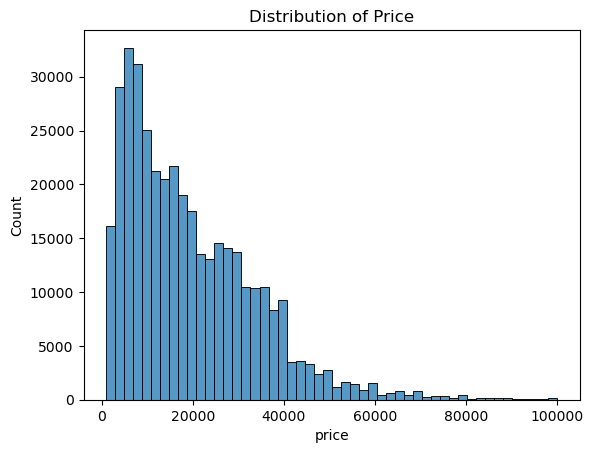

In [44]:
plot = sns.histplot(data = vehicles_df.query('price <= 100_000 & price >= 1000')['price'], bins = 50)
plot.set(title = 'Distribution of Price')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

##### Data Filtering of Price and VIN and Dropping null values

In [47]:
vehicles_df = vehicles_df[(vehicles_df.price >= 1000) & (vehicles_df.price <= 100000)]

In [48]:
vehicles_df = vehicles_df.copy()
vehicles_df.loc[:, 'price_log'] = np.log(vehicles_df.price)

In [49]:
duplicate_rows = vehicles_df[vehicles_df.duplicated(subset='VIN', keep=False)]
print(f"Number of duplicate rows based on VIN: {len(duplicate_rows)}")

# Drop duplicates, keeping the first occurrence
vehicles_df = vehicles_df.drop_duplicates(subset='VIN', keep='first')

vehicles_df = vehicles_df.dropna(subset=['model', 'title_status'])
vehicles_df.shape

Number of duplicate rows based on VIN: 312847


(98453, 19)

In [50]:
missing_percentages = vehicles_df.isnull().mean() * 100
print(missing_percentages)

id               0.000000
region           0.000000
price            0.000000
year             0.461134
manufacturer     2.692655
model            0.000000
condition       45.465349
cylinders       40.104415
fuel             1.066499
odometer         0.451992
title_status     0.000000
transmission     0.770926
VIN              0.000000
drive           21.689537
size            72.866241
type            13.518125
paint_color     20.895250
state            0.000000
price_log        0.000000
dtype: float64


In [51]:
vehicles_df['model'] = vehicles_df['model'].str.lower()
vehicles_df['model'] = vehicles_df['model'].str.strip()
vehicles_df['model'] = vehicles_df['model'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)))
vehicles_df = vehicles_df[vehicles_df.model != '']

In [52]:
vehicles_df = vehicles_df.dropna(subset=['year'])
vehicles_df = vehicles_df[vehicles_df.year >= 2000]
vehicles_df.shape

(92507, 19)

In [53]:
vehicles_df.loc[:, 'age'] = vehicles_df.year.max() - vehicles_df.year

##### Fill in missing values

<p>Here, all missing values in each column will be filled in as much as possible with existing data based on characteristics of the vehicles. In the end, we will have no missing data before continuing on building models</p>

<br>
<p>Filling in manufacturing values as much as possible with existing data, rest are dropped.</p>

In [56]:
print('Number of missing values before: ' + str(vehicles_df.manufacturer.isnull().sum()))
# Filling in missing values for manufacturing column
manufacturer_mapping = vehicles_df.groupby(['model', 'year'])['manufacturer'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

vehicles_df['manufacturer'] = vehicles_df.apply(
    lambda row: manufacturer_mapping[(row['model'], row['year'])] if pd.isnull(row['manufacturer']) else row['manufacturer'],
    axis=1
)

print('Number of missing values after applying mapping: ' + str(vehicles_df.manufacturer.isnull().sum()))
# After applying as much mapping possible with combination of manufacturing and year keys, remove the rest of null manufacturers
vehicles_df = vehicles_df.dropna(subset=['manufacturer'])

Number of missing values before: 1846
Number of missing values after applying mapping: 1613


In [57]:
# verify model, manufacturer, year have 0 missing values
print('Missing values for model: ' + str(vehicles_df['model'].isnull().sum()))
print('Missing values for manufacturer: ' + str(vehicles_df['manufacturer'].isnull().sum()))
print('Missing values for year: ' + str(vehicles_df['year'].isnull().sum()))

Missing values for model: 0
Missing values for manufacturer: 0
Missing values for year: 0


<br>
<p>Filling in size values as much as possible with existing data, rest are dropped.</p>

In [59]:
print('Number of missing values before: ' + str(vehicles_df['size'].isnull().sum()))
# Filling in missing values for size column based on model, manufacturer, and year of the vehicle
size_mapping = vehicles_df.groupby(['model', 'manufacturer', 'year'])['size'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean())

def fill_size(row):
    if pd.isnull(row['size']):
        return size_mapping.get((row['model'], row['manufacturer'], row['year']), row['size'])
    else:
        return row['size']

# Apply the function to fill missing size values and drop the rest
vehicles_df['size'] = vehicles_df.apply(fill_size, axis=1)
print('Number of missing values after applying mapping: ' + str(vehicles_df['size'].isnull().sum()))
vehicles_df = vehicles_df.dropna(subset=['size'])

Number of missing values before: 66880
Number of missing values after applying mapping: 24186


<br>
<p>Filling in condition values as much as possible with existing data, rest are dropped.</p>

In [61]:
print('before: ' + str(vehicles_df.condition.isnull().sum()))
# Filling in missing values for condition column based on model, manufacturer, and year of the vehicle
condition_mapping = vehicles_df.groupby(['model', 'manufacturer', 'year'])['condition'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean())

def fill_condition(row):
    if pd.isnull(row['condition']):
        return condition_mapping.get((row['model'], row['manufacturer'], row['year']), row['condition'])
    else:
        return row['condition']

# Apply the function to fill missing size values and drop the rest
vehicles_df['condition'] = vehicles_df.apply(fill_condition, axis=1)
print('Number of missing values after applying mapping: ' + str(vehicles_df.condition.isnull().sum()))
vehicles_df = vehicles_df.dropna(subset=['condition'])

before: 31218
Number of missing values after applying mapping: 531


<br>
<p>Filling in cylinders values as much as possible with existing data, rest are dropped.</p>

In [63]:
print('before: ' + str(vehicles_df.cylinders.isnull().sum()))
# Filling in missing values for cylinders column based on model, manufacturer, and year of the vehicle
cylinder_mapping = vehicles_df.groupby(['model', 'manufacturer', 'year'])['cylinders'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean())

def fill_cylinders(row):
    if pd.isnull(row['cylinders']):
        return cylinder_mapping.get((row['model'], row['manufacturer'], row['year']), row['cylinders'])
    else:
        return row['cylinders']

# Apply the function to fill missing size values and drop the rest
vehicles_df['cylinders'] = vehicles_df.apply(fill_cylinders, axis=1)
print('Number of missing values after applying mapping: ' + str(vehicles_df.cylinders.isnull().sum()))
vehicles_df = vehicles_df.dropna(subset=['cylinders'])

before: 24577
Number of missing values after applying mapping: 192


<br>
<p>Filling in drive values as much as possible with existing data, rest are dropped.</p>

In [65]:
print('before: ' + str(vehicles_df.drive.isnull().sum()))
# Filling in missing values for drive column based on model, manufacturer, and year of the vehicle
drive_mapping = vehicles_df.groupby(['model', 'manufacturer', 'year'])['drive'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean())

def fill_drive(row):
    if pd.isnull(row['drive']):
        return drive_mapping.get((row['model'], row['manufacturer'], row['year']), row['drive'])
    else:
        return row['drive']

# Apply the function to fill missing size values and drop the rest
vehicles_df['drive'] = vehicles_df.apply(fill_drive, axis=1)
print('Number of missing values after applying mapping: ' + str(vehicles_df.drive.isnull().sum()))
vehicles_df = vehicles_df.dropna(subset=['drive'])

before: 12367
Number of missing values after applying mapping: 106


<br>
<p>Filling in type values as much as possible with existing data, rest are dropped.</p>

In [67]:
print('before: ' + str(vehicles_df.type.isnull().sum()))
# Filling in missing values for type column based on model, manufacturer, and year of the vehicle
type_mapping = vehicles_df.groupby(['model', 'manufacturer', 'year'])['type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean())

def fill_type(row):
    if pd.isnull(row['type']):
        return type_mapping.get((row['model'], row['manufacturer'], row['year']), row['type'])
    else:
        return row['type']

# Apply the function to fill missing size values and drop the rest
vehicles_df['type'] = vehicles_df.apply(fill_type, axis=1)
print('Number of missing values after applying mapping: ' + str(vehicles_df.type.isnull().sum()))
vehicles_df = vehicles_df.dropna(subset=['type'])

before: 8880
Number of missing values after applying mapping: 72


<br>
<p>Filling in transmission values as much as possible with existing data, rest are dropped.</p>

In [69]:
print('before: ' + str(vehicles_df.transmission.isnull().sum()))
# Filling in missing values for transmission column based on model, manufacturer, and year of the vehicle
transmission_mapping = vehicles_df.groupby(['model', 'manufacturer', 'year'])['transmission'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean())

def fill_transmission(row):
    if pd.isnull(row['transmission']):
        return transmission_mapping.get((row['model'], row['manufacturer'], row['year']), row['transmission'])
    else:
        return row['transmission']

# Apply the function to fill missing size values and drop the rest
vehicles_df['transmission'] = vehicles_df.apply(fill_transmission, axis=1)
print('Number of missing values after applying mapping: ' + str(vehicles_df.transmission.isnull().sum()))

before: 578
Number of missing values after applying mapping: 0


<br>
<p>Filling in fuel values as much as possible with existing data, rest are dropped.</p>

In [71]:
print('before: ' + str(vehicles_df.fuel.isnull().sum()))
# Filling in missing values for fuel column based on model, manufacturer, and year of the vehicle
fuel_mapping = vehicles_df.groupby(['model', 'manufacturer', 'year'])['fuel'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean())

def fill_fuel(row):
    if pd.isnull(row['fuel']):
        return fuel_mapping.get((row['model'], row['manufacturer'], row['year']), row['fuel'])
    else:
        return row['fuel']

# Apply the function to fill missing size values and drop the rest
vehicles_df['fuel'] = vehicles_df.apply(fill_fuel, axis=1)
print('Number of missing values after applying mapping: ' + str(vehicles_df.fuel.isnull().sum()))

before: 135
Number of missing values after applying mapping: 0


<br>
<p>Filling in paint color values as much as possible with existing data, rest are dropped.</p>

In [73]:
print('before: ' + str(vehicles_df['paint_color'].isnull().sum()))
# Filling in missing values for paint_color column based on model, manufacturer, and year of the vehicle
paint_mapping = vehicles_df.groupby(['model', 'manufacturer', 'year'])['paint_color'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean())

def fill_paint(row):
    if pd.isnull(row['paint_color']):
        return fuel_mapping.get((row['model'], row['manufacturer'], row['year']), row['paint_color'])
    else:
        return row['paint_color']

# Apply the function to fill missing size values and drop the rest
vehicles_df['paint_color'] = vehicles_df.apply(fill_paint, axis=1)
print('Number of missing values after applying mapping: ' + str(vehicles_df['paint_color'].isnull().sum()))

before: 12738
Number of missing values after applying mapping: 0


<br>
<p>Filtering odometer column to get rid of any outliers</p>

In [75]:
vehicles_df = vehicles_df.dropna(subset=['odometer'])
vehicles_df = vehicles_df[vehicles_df.odometer <= 200000]

<br>
<p>Filtering outliers of manufacturers</p>

In [77]:
outlier_manufacturers = ["mini", "pontiac", "rover", "jaguar", "porsche", 
                         "mercury", "saturn", "alfa-romeo", "tesla", "fiat", 
                         "harley-davidson", "ferrari", "datsun", "aston-martin",
                        "land rover", "morgan"]

vehicles_df = vehicles_df[~vehicles_df['manufacturer'].isin(outlier_manufacturers)]

<br>
<p>Changing data types of columns to appropriate data type</p>

In [79]:
vehicles_df['year'] = vehicles_df['year'].astype(int)
vehicles_df['age'] = vehicles_df['age'].astype(int)
vehicles_df['manufacturer'] = vehicles_df['manufacturer'].astype('category')
vehicles_df['model'] = vehicles_df['model'].astype('category')
vehicles_df['condition'] = vehicles_df['condition'].astype('category')
vehicles_df['fuel'] = vehicles_df['fuel'].astype('category')
vehicles_df['title_status'] = vehicles_df['title_status'].astype('category')
vehicles_df['transmission'] = vehicles_df['transmission'].astype('category')
vehicles_df['drive'] = vehicles_df['drive'].astype('category')
vehicles_df['size'] = vehicles_df['size'].astype('category')
vehicles_df['type'] = vehicles_df['type'].astype('category')
vehicles_df['paint_color'] = vehicles_df['paint_color'].astype('category')

<br>
<p>Function to convert cylinders column to a numerical column</p>

In [81]:
# Function that converts cylinders to numerical values. Other value is mapped to -1 as it is not known
def convert_cylinders(value):
    if 'cylinders' in value:
        return int(value.split()[0])
    elif value == 'other':
        return -1
    
vehicles_df['cylinders'] = vehicles_df['cylinders'].apply(convert_cylinders)

In [82]:
# Verifying missing percentages once more, should be 0% for all columns now
missing_percentages = vehicles_df.isnull().mean() * 100
print(missing_percentages)

id              0.0
region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
VIN             0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
price_log       0.0
age             0.0
dtype: float64


In [83]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61002 entries, 28 to 426746
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            61002 non-null  int64   
 1   region        61002 non-null  object  
 2   price         61002 non-null  int64   
 3   year          61002 non-null  int64   
 4   manufacturer  61002 non-null  category
 5   model         61002 non-null  category
 6   condition     61002 non-null  category
 7   cylinders     61002 non-null  int64   
 8   fuel          61002 non-null  category
 9   odometer      61002 non-null  float64 
 10  title_status  61002 non-null  category
 11  transmission  61002 non-null  category
 12  VIN           61002 non-null  object  
 13  drive         61002 non-null  category
 14  size          61002 non-null  category
 15  type          61002 non-null  category
 16  paint_color   61002 non-null  category
 17  state         61002 non-null  object  
 18  price_log

In [84]:
# End result of the number of rows left
vehicles_df.shape

(61002, 20)

In [85]:
vehicles_df.describe()

,id,price,year,cylinders,odometer,price_log,age
count,6.100200e+04,61002.000000,61002.000000,61002.000000,61002.000000,61002.000000,61002.000000
mean,7.312112e+09,17479.745648,2012.896495,5.481427,94026.790384,9.543102,9.103505
std,4.178181e+06,12264.496041,4.409782,1.569311,48480.433607,0.689797,4.409782
min,7.301589e+09,1000.000000,2000.000000,-1.000000,0.000000,6.907755,0.000000
25%,7.309398e+09,8900.000000,2010.000000,4.000000,56032.750000,9.093807,6.000000
50%,7.313498e+09,13999.000000,2013.000000,6.000000,95044.500000,9.546741,9.000000
75%,7.315444e+09,22979.250000,2016.000000,6.000000,130000.000000,10.042347,12.000000
max,7.317099e+09,100000.000000,2022.000000,12.000000,200000.000000,11.512925,22.000000


<p>After cleaning the data to contain no missing values and realistic price valuations on vehicles between 1,000 and 100,000 dollars, we are left with 61,002 unique records. We also filtered based on odometer outliers and manufacturer outliers</p>

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

<p>For the models being built (linear regression, ridge, and lasso), features being used are year, odometer, manufacturer, condition, size, and type. 3 types of encoding are applied based on the type of data - Ordinal, OneHot, and Standard Scaler on the numerical values.</p>

In [89]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import time

In [90]:
# Features being used in the model - Disregarded some features as model was taking a long time to build
features = ['year', 'odometer', 'manufacturer', 'condition', 'size', 'type']
# preditive feature is the log of price, which was seen by distribution graph that it was log.
target = 'price_log'

X = vehicles_df[features]
y = vehicles_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Separating features based on encoding needed for the model
categorical_features = ['manufacturer', 'type']
ordinal_features = ['condition', 'size']
numeric_features = ['odometer', 'year']

In [92]:
# Pipeline for numeric features (PolynomialFeatures and StandardScaler)
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features (OneHotEncoder)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Pipeline for ordinal features (OrdinalEncoder)
ordinal_transformer = OrdinalEncoder()


# ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Apply to numeric columns
        ('cat', categorical_transformer, categorical_features),  # Apply to categorical columns
        ('ord', ordinal_transformer, ordinal_features)  # Apply to ordinal columns
    ])

In [93]:
# Function to get feature names
def get_feature_names(pipeline):
    preprocessor = pipeline.named_steps['preprocessor']
    
    # PolynomialFeatures
    poly_transformer = preprocessor.named_transformers_['num'].named_steps['poly']
    numeric_features = preprocessor.transformers_[0][2]
    poly_feature_names = poly_transformer.get_feature_names_out(input_features=numeric_features)
    
    # OneHotEncoder
    onehot_transformer = preprocessor.named_transformers_['cat']
    categorical_feature_names = onehot_transformer.get_feature_names_out()
   
    # OrdinalEncoder
    ordinal_transformer = preprocessor.named_transformers_['ord']
    ordinal_feature_names = ordinal_transformer.get_feature_names_out()

    # Combine all feature names
    all_feature_names = np.concatenate([
        poly_feature_names,
        categorical_feature_names,
        ordinal_feature_names
    ])
    
    return all_feature_names

# Function to get coefficients
def get_coefficients(pipelineName, feature_names, model):
    coefs = pipelineName.named_steps[model].coef_
    print("Number of coefficients:", len(coefs))
    print("Number of feature names:", len(feature_names))
    if len(coefs) != len(feature_names):
        raise ValueError("Mismatch between number of coefficients and feature names")
    return pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})

In [94]:
# Pipeline with PolynomialFeatures and Linear Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('linear', LinearRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'type']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['condition', 'size'])])),
                ('linear', LinearRegression())])

In [95]:
start = time.time()
# Grid for polynomial degrees to be tested with
param_grid = {'preprocessor__num__poly__degree': range(1, 3)}  

# GridSearchCV for optimization
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Predictions using the best model
y_pred_linear_opt = grid_search.predict(X_test)

# Evaluate the optimized model
mse_linear_opt = mean_squared_error(y_test, y_pred_linear_opt)
r2_linear_opt = r2_score(y_test, y_pred_linear_opt)

mlr_best_degree = grid_search.best_params_['preprocessor__num__poly__degree']

print(f"Best Degree for multilinear regression: {mlr_best_degree}")
print(f"MSE: {mse_linear_opt}, R2: {r2_linear_opt}")
end = time.time()
print(f"Time taken for multilinear regression: {end - start}")

Best Degree for multilinear regression: 2
MSE: 0.14455608796872924, R2: 0.700364550876921
Time taken for multilinear regression: 0.8000671863555908


In [96]:
# Ridge pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

ridge_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'type']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['condition', 'size'])])),
                ('ridge', Ridge())])

In [97]:
# Grid for polynomial degree and Ridge's alpha to be tested with
start1 = time.time()
param_grid_ridge = {
    'preprocessor__num__poly__degree': range(1, 3),
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# GridSearchCV for Ridge Regression
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)

# Predictions using the best Ridge model
y_pred_ridge_opt = grid_search_ridge.predict(X_test)

# Evaluate the model
mse_ridge_opt = mean_squared_error(y_test, y_pred_ridge_opt)
r2_ridge_opt = r2_score(y_test, y_pred_ridge_opt)

ridge_best_degree = grid_search_ridge.best_params_['preprocessor__num__poly__degree']
ridge_best_alpha = grid_search_ridge.best_params_['ridge__alpha']

end1 = time.time()
print(f"Ridge Regression - Best Degree: {ridge_best_degree}, Best Alpha: {ridge_best_alpha}")
print(f"MSE: {mse_ridge_opt}, R2: {r2_ridge_opt}")
print(f"Time taken for Ridge: {end1-start1}")

Ridge Regression - Best Degree: 2, Best Alpha: 0.01
MSE: 0.14458785881769948, R2: 0.7002986963512903
Time taken for Ridge: 2.612096071243286


In [98]:
# Lasso pipeline
pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

pipeline_lasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'type']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['condition', 'size'])])),
                ('lasso', Lasso())])

In [99]:
start2 = time.time()
# Grid of alpha values for Lasso to test with
param_grid_lasso = {
    'preprocessor__num__poly__degree': range(1, 3),
    'lasso__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# GridSearchCV for Lasso Regression
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(X_train, y_train)

# Best Lasso model
lasso_optimized = grid_search_lasso.best_estimator_['lasso']

# Predictions using the best Ridge model
y_pred_lasso_opt = grid_search_lasso.predict(X_test)

# Evaluate the model
mse_lasso_opt = mean_squared_error(y_test, y_pred_lasso_opt)
r2_lasso_opt = r2_score(y_test, y_pred_lasso_opt)

lasso_best_degree = grid_search_lasso.best_params_['preprocessor__num__poly__degree']
lasso_best_alpha = grid_search_lasso.best_params_['lasso__alpha']

end2 = time.time()

print(f"Lasso Regression - Best Degree: {lasso_best_degree}, Best Alpha: {lasso_best_alpha}")
print(f"MSE: {mse_lasso_opt}, R2: {r2_lasso_opt}")
print(f"Time taken for Ridge: {end2-start2}")

Lasso Regression - Best Degree: 2, Best Alpha: 0.01
MSE: 0.17452411136691004, R2: 0.6382469169783935
Time taken for Ridge: 14.426347017288208


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

##### Overall Performance Data on Models

In [102]:
models_df = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "Best_Polynomial_Degree": [mlr_best_degree, ridge_best_degree, lasso_best_degree],
    "Best_Alpha": ["N/A", ridge_best_alpha, lasso_best_alpha],
    "Test_MSE": [mse_linear_opt, mse_ridge_opt, mse_lasso_opt],
    "Test_R2": [r2_linear_opt, r2_ridge_opt, r2_lasso_opt],
    "Total_Time(in seconds)": [(end - start), (end1 - start1), (end2 - start2)],
})
models_df

,Model,Best_Polynomial_Degree,Best_Alpha,Test_MSE,Test_R2,Total_Time(in seconds)
0,Linear Regression,2,N/A,0.144556,0.700365,0.800067
1,Ridge Regression,2,0.01,0.144588,0.700299,2.612096
2,Lasso Regression,2,0.01,0.174524,0.638247,14.426347


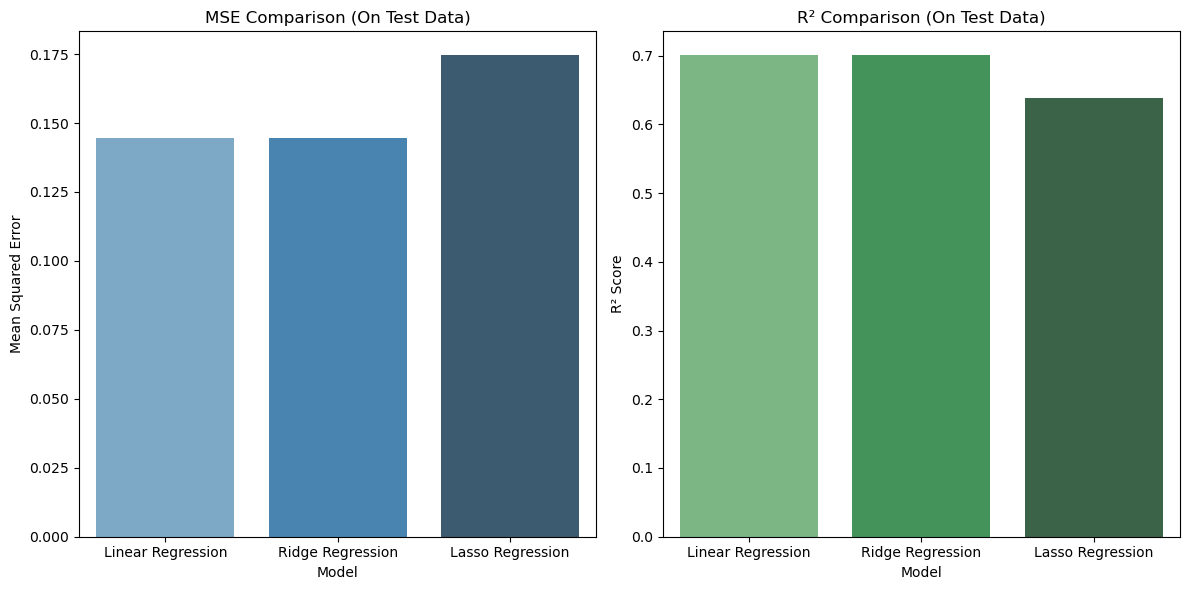

In [103]:
plt.figure(figsize=(12, 6))

# Plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="Test_MSE", data=models_df, palette="Blues_d")
plt.title('MSE Comparison (On Test Data)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')

# Plot for Test R2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x="Model", y="Test_R2", data=models_df, palette="Greens_d")
plt.title('R² Comparison (On Test Data)')
plt.ylabel('R² Score')
plt.xlabel('Model')

# Display the plots
plt.tight_layout()
plt.show()

<p>As per the results for the 3 models built, Linear Regression, Ridge Regression, and Lasso Regression, The best model is linear regression that has the smallest MSE of 0.144 and has the best R2 score of 0.7, which indicates that it is like to be an average predictive model. Ridge regression performed pretty much the same but was slower.</p>

##### Coefficients per Model

In [106]:
# Get the best model
best_model = grid_search.best_estimator_

# Get feature names and coefficients
feature_names = get_feature_names(best_model)
coefficients_df = get_coefficients(best_model, feature_names, 'linear')
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

coefficients_df.head()

Number of coefficients: 47
Number of feature names: 47


,Feature,Coefficient
5,year^2,18.479981
1,odometer,7.220208
42,type_truck,0.455652
40,type_pickup,0.444436
21,manufacturer_lexus,0.388763


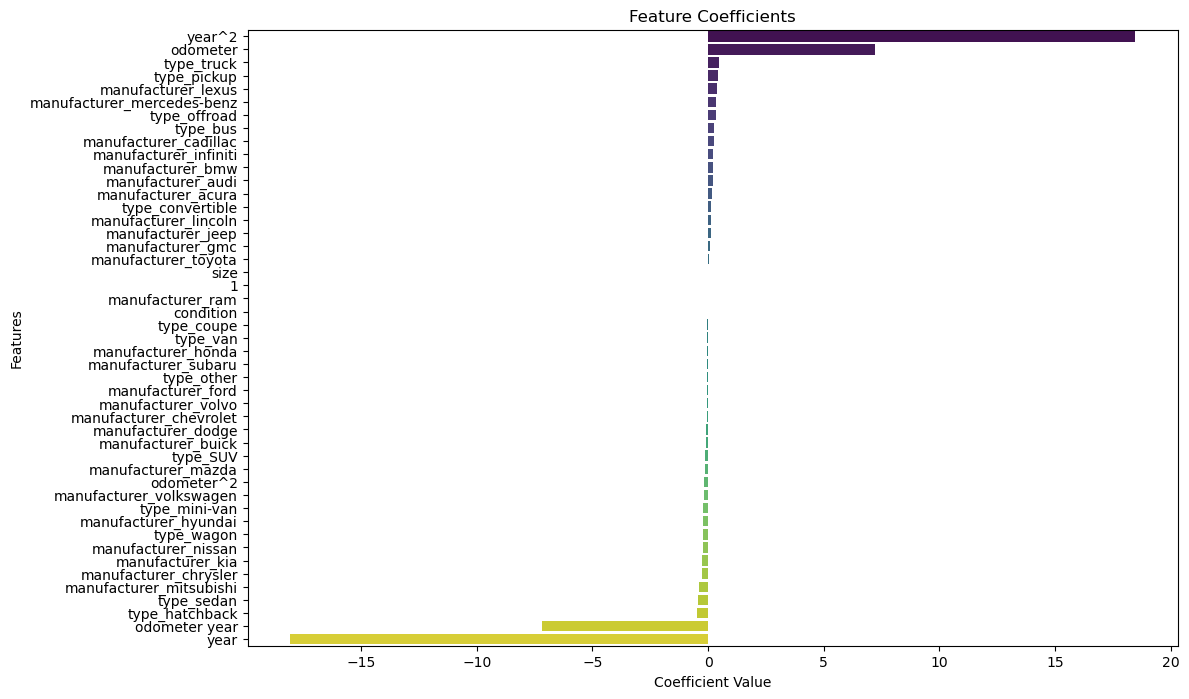

In [107]:
plt.figure(figsize=(12, 8))
sns.barplot(data=coefficients_df, x='Coefficient', y='Feature', palette='viridis')

plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

plt.show()

In [108]:
# Get the best model
best_model_ridge = grid_search_ridge.best_estimator_

# Get feature names and coefficients
feature_names_ridge = get_feature_names(best_model_ridge)
coefficients_df_ridge = get_coefficients(best_model_ridge, feature_names_ridge, 'ridge')
coefficients_df_ridge = coefficients_df_ridge.sort_values(by='Coefficient', ascending=False)

coefficients_df_ridge.head()

Number of coefficients: 47
Number of feature names: 47


,Feature,Coefficient
1,odometer,10.776189
5,year^2,7.649178
42,type_truck,0.456533
40,type_pickup,0.444898
21,manufacturer_lexus,0.388728


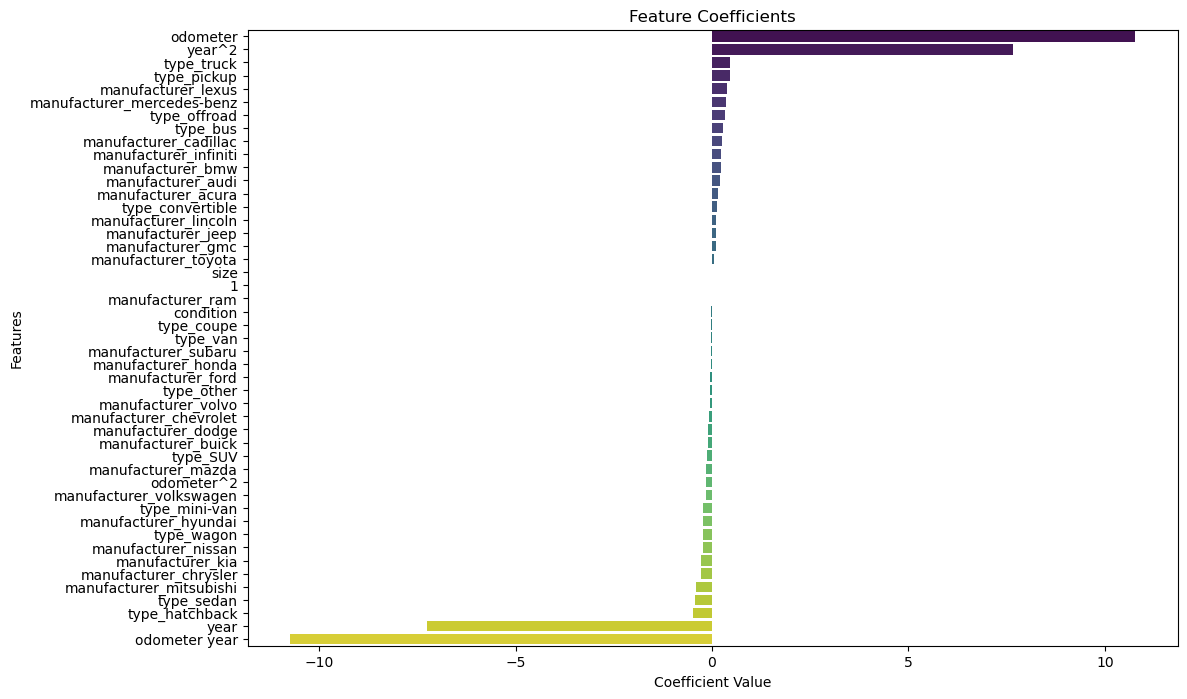

In [109]:
plt.figure(figsize=(12, 8))
sns.barplot(data=coefficients_df_ridge, x='Coefficient', y='Feature', palette='viridis')

plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

plt.show()

In [110]:
# Get the best model
best_model_lasso = grid_search_lasso.best_estimator_

# Get feature names and coefficients
feature_names_lasso = get_feature_names(best_model_lasso)
coefficients_df_lasso = get_coefficients(best_model_lasso, feature_names_lasso, 'lasso')
coefficients_df_lasso = coefficients_df_lasso.sort_values(by='Coefficient', ascending=False)

coefficients_df_lasso.head()

Number of coefficients: 47
Number of feature names: 47


,Feature,Coefficient
42,type_truck,0.438368
40,type_pickup,0.433546
2,year,0.328475
5,year^2,0.000075
0,1,0.000000


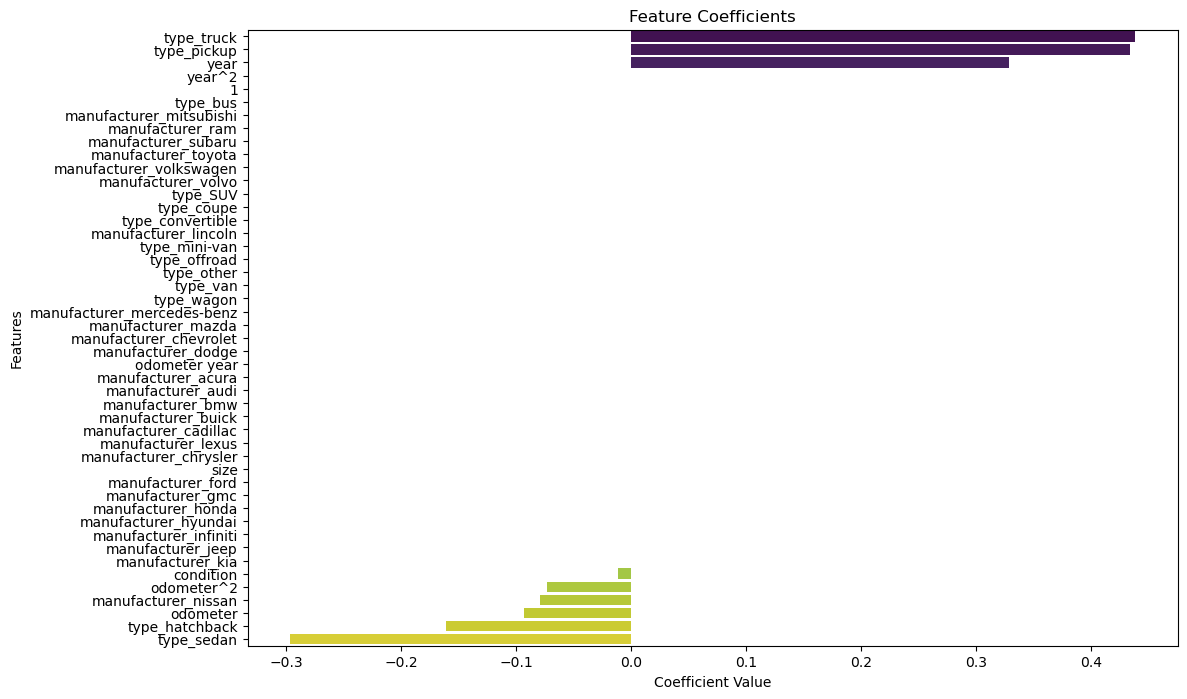

In [111]:
plt.figure(figsize=(12, 8))
sns.barplot(data=coefficients_df_lasso, x='Coefficient', y='Feature', palette='viridis')

plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

plt.show()

<p>From the coefficients on all 3 models: odomoter year, year, and type of vehicle play major roles in determining log price. From using polynomial features, we can indefinitely conclude that odometer and year of the vehicle play are features that impact price the most. While some manufacturers have an impact, it is nearly negligible in the model and safe to say that manufacturer probably have prices around the same for vehicles.</p>

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

##### Findings:

<p>Based on the 3 models built, we found that linear regression model performed the best and fastest. The model's predictive analysis had a major impact from odometer, year, and with slight impact from type of vehicle. As manufacturer outliers were removed from the data such as ferarri, where value of car is extremely high and not as common, it is conclusive that common household vehicle manufacturers all operate on equal grounds.</p>

<p>It is also safe to say that odometer and year of the vehicle have positive impact and negative impact of the price. When observing the relationship of price and year, if we take year as the age, then price decays over time.</p>

##### Recommendations
<p>Used car dealerships will be more profitable with cars that are relatively newer and relatively have lower numbers on the odometer.</p>

##### Next steps
<p>Exploring how region impacts prices as well as specific features of vehicles such as number of cylinders, transmission, and title status should be used to build further models. The current exploration utilizes basic features on a general scale, ignoring specific vehicle configurations.</p>